## Exploring Texas Emissions Data

In [49]:
# import the proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import altair as alt
import plotly.graph_objects as go
import plotly.express as px

In [50]:
# reading in the file
df = pd.read_csv('./texas_final.csv')

In [51]:
# exploring the file
df.head()

Facility Id        FRS Id    Facility Name       City  County State  \
0      1013701           NaN  30-30 Gas Plant     Plains  Yoakum    TX   
1      1013701           NaN  30-30 Gas Plant     Plains  Yoakum    TX   
2      1003188  1.100006e+11     3M BROWNWOOD  BROWNWOOD   Brown    TX   
3      1003188  1.100006e+11     3M BROWNWOOD  BROWNWOOD   Brown    TX   
4      1003188  1.100006e+11     3M BROWNWOOD  BROWNWOOD   Brown    TX   

   Reporting Year Industry Type (subparts)  \
0            2022          C,PP,RR (RPT),W   
1            2021                   C,UU,W   
2            2022                      C,N   
3            2021                      C,N   
4            2020                      C,N   

                             Industry Type (sectors) Unit Name  \
0  Injection of CO2, Petroleum and Natural Gas Sy...      GP-1   
1  Injection of CO2, Petroleum and Natural Gas Sy...      GP-1   
2                                           Minerals    GP-All   
3                                           Minerals    GP-All   
4                                           Minerals    GP-All   

                       Unit Type  CO2 Emissions  Methane Emissions  \
0  OCS (Other combustion source)        25660.2              12.00   
1  OCS (Other combustion source)        16015.2               7.50   
2  OCS (Other combustion source)        29359.6              13.75   
3  OCS (Other combustion source)        28088.0              13.25   
4  OCS (Other combustion source)        29207.2              13.75   

   N2O Emissions  Biogenic CO2 Emissions  
0         14.304                     0.0  
1          8.940                     0.0  
2         16.390                     0.0  
3         15.794                     0.0  
4         16.390                     0.0

In [52]:
#changing all city names to lowercase for easier searching
df['City'] = df['City'].apply(str.lower)

In [53]:
#check
df.head()

Facility Id        FRS Id    Facility Name       City  County State  \
0      1013701           NaN  30-30 Gas Plant     plains  Yoakum    TX   
1      1013701           NaN  30-30 Gas Plant     plains  Yoakum    TX   
2      1003188  1.100006e+11     3M BROWNWOOD  brownwood   Brown    TX   
3      1003188  1.100006e+11     3M BROWNWOOD  brownwood   Brown    TX   
4      1003188  1.100006e+11     3M BROWNWOOD  brownwood   Brown    TX   

   Reporting Year Industry Type (subparts)  \
0            2022          C,PP,RR (RPT),W   
1            2021                   C,UU,W   
2            2022                      C,N   
3            2021                      C,N   
4            2020                      C,N   

                             Industry Type (sectors) Unit Name  \
0  Injection of CO2, Petroleum and Natural Gas Sy...      GP-1   
1  Injection of CO2, Petroleum and Natural Gas Sy...      GP-1   
2                                           Minerals    GP-All   
3                                           Minerals    GP-All   
4                                           Minerals    GP-All   

                       Unit Type  CO2 Emissions  Methane Emissions  \
0  OCS (Other combustion source)        25660.2              12.00   
1  OCS (Other combustion source)        16015.2               7.50   
2  OCS (Other combustion source)        29359.6              13.75   
3  OCS (Other combustion source)        28088.0              13.25   
4  OCS (Other combustion source)        29207.2              13.75   

   N2O Emissions  Biogenic CO2 Emissions  
0         14.304                     0.0  
1          8.940                     0.0  
2         16.390                     0.0  
3         15.794                     0.0  
4         16.390                     0.0

In [54]:
# Select only counties we care about right now
beaumont = df[(df['County'] == 'Jefferson') | (df['County'] == 'Orange') | (df['County'] == 'Hardin')]
beaumont.reset_index(inplace = True)

In [55]:
beaumont.head(5)

index  Facility Id        FRS Id  \
0    172      1003780  1.100144e+11   
1    173      1003780  1.100144e+11   
2    174      1003780  1.100144e+11   
3    175      1003780  1.100144e+11   
4    176      1003780  1.100144e+11   

                                      Facility Name         City     County  \
0  AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches  Jefferson   
1  AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches  Jefferson   
2  AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches  Jefferson   
3  AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches  Jefferson   
4  AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches  Jefferson   

  State  Reporting Year Industry Type (subparts) Industry Type (sectors)  \
0    TX            2022                        C               Chemicals   
1    TX            2022                        C               Chemicals   
2    TX            2022                        C               Chemicals   
3    TX            2021                        C               Chemicals   
4    TX            2021                        C               Chemicals   

    Unit Name                            Unit Type  CO2 Emissions  \
0    REGENHTR                 PRH (Process Heater)         1173.7   
1  RGNHTR-LMA                 PRH (Process Heater)         1877.9   
2   TURBINEDB  CCCT (CC (Turbine, combined cycle))            0.0   
3    REGENHTR                 PRH (Process Heater)         1294.7   
4  RGNHTR-LMA                 PRH (Process Heater)         2071.5   

   Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
0                0.5          0.596                     0.0  
1                1.0          1.192                     0.0  
2                0.0          0.000                     0.0  
3                0.5          0.596                     0.0  
4                1.0          1.192                     0.0

In [56]:
# fix weird column
beaumont.drop(labels='index', axis = 1)

Facility Id        FRS Id  \
0         1003780  1.100144e+11   
1         1003780  1.100144e+11   
2         1003780  1.100144e+11   
3         1003780  1.100144e+11   
4         1003780  1.100144e+11   
...           ...           ...   
3376      1014573           NaN   
3377      1014573           NaN   
3378      1014728           NaN   
3379      1002289  1.100438e+11   
3380      1002289  1.100438e+11   

                                         Facility Name         City  \
0     AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches   
1     AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches   
2     AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches   
3     AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches   
4     AIR LIQUIDE - PORT NECHES ASU COGENERATION PLANT  port neches   
...                                                ...          ...   
3376                                             Vidor       orange   
3377                                             Vidor       orange   
3378                    Vidor (ETC) Compressor Station        vidor   
3379                           WEST BEAUMONT GAS PLANT     beaumont   
3380                           WEST BEAUMONT GAS PLANT     beaumont   

         County State  Reporting Year Industry Type (subparts)  \
0     Jefferson    TX            2022                        C   
1     Jefferson    TX            2022                        C   
2     Jefferson    TX            2022                        C   
3     Jefferson    TX            2021                        C   
4     Jefferson    TX            2021                        C   
...         ...   ...             ...                      ...   
3376     Orange    TX            2022                      C,W   
3377     Orange    TX            2022                      C,W   
3378     Orange    TX            2022                      C,W   
3379  Jefferson    TX            2021                      C,W   
3380  Jefferson    TX            2020                      C,W   

                Industry Type (sectors)                  Unit Name  \
0                             Chemicals                   REGENHTR   
1                             Chemicals                 RGNHTR-LMA   
2                             Chemicals                  TURBINEDB   
3                             Chemicals                   REGENHTR   
4                             Chemicals                 RGNHTR-LMA   
...                                 ...                        ...   
3376  Petroleum and Natural Gas Systems                      41208   
3377  Petroleum and Natural Gas Systems                      41209   
3378  Petroleum and Natural Gas Systems                       CP-1   
3379  Petroleum and Natural Gas Systems  CP-Id: 7780501 (GHG Only)   
3380  Petroleum and Natural Gas Systems  CP-Id: 7780501 (GHG Only)   

                                            Unit Type  CO2 Emissions  \
0                                PRH (Process Heater)         1173.7   
1                                PRH (Process Heater)         1877.9   
2                 CCCT (CC (Turbine, combined cycle))            0.0   
3                                PRH (Process Heater)         1294.7   
4                                PRH (Process Heater)         2071.5   
...                                               ...            ...   
3376  RICE (Reciprocating internal combustion engine)         1135.3   
3377  RICE (Reciprocating internal combustion engine)         1205.0   
3378                    OCS (Other combustion source)        20557.9   
3379                                              NaN         6666.8   
3380                                              NaN         7332.9   

      Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
0                  0.50          0.596                     0.0  
1                  1.00          1.192                     0.0  
2                  0.00          0.000

In [57]:
#see which cities have the highest CO2 emissions
beaumont.groupby(['City'])['CO2 Emissions'].sum()

City
beaumont       6.602702e+07
bridge city    2.954516e+07
kountze        6.867881e+05
nederland      5.858877e+06
orange         3.823161e+07
port arthur    1.293477e+08
port neches    1.451316e+07
sabine pass    4.511600e+03
silsbee        9.908625e+05
vidor          6.488137e+05
Name: CO2 Emissions, dtype: float64

In [58]:
# find the middle of the data so I can pull the top half
facility_CO2 = beaumont.groupby(['Facility Name'])['CO2 Emissions'].sum().to_frame()
facility_CO2.describe()

CO2 Emissions
count   6.000000e+01
mean    4.764241e+06
std     1.051731e+07
min     2.000000e+00
25%     2.011455e+05
50%     7.051641e+05
75%     3.877428e+06
max     5.719310e+07

In [59]:
# pull top half of data and sort it for graphing
facility_CO2_max = facility_CO2[facility_CO2 ['CO2 Emissions'] >= 7.051641e+05]
facility_CO2_max.reset_index(inplace = True)
facility_CO2_max.sort_values(['CO2 Emissions'], inplace = True)

/var/folders/zx/tqw9f93s3_v5bzd67p8t0wqm0000gn/T/ipykernel_23281/3890115665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility_CO2_max.sort_values(['CO2 Emissions'], inplace = True)


In [60]:
# find the middle of the data so I can pull the top half
facility_methane = beaumont.groupby(['Facility Name'])['Methane Emissions'].sum().to_frame()
facility_methane.describe()

Methane Emissions
count          60.000000
mean         6797.667500
std         15396.702933
min             0.000000
25%            94.500000
50%           369.000000
75%          4805.375000
max         85268.750000

In [61]:
# pull top half of data and sort it for graphing
facility_methane_max = facility_methane[facility_methane['Methane Emissions'] >= 369]
facility_methane_max.reset_index(inplace = True)
facility_methane_max.sort_values(['Methane Emissions'], inplace = True)

/var/folders/zx/tqw9f93s3_v5bzd67p8t0wqm0000gn/T/ipykernel_23281/738316089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility_methane_max.sort_values(['Methane Emissions'], inplace = True)


In [62]:
# find the middle of the data so I can pull the top half
facility_N2O = beaumont.groupby(['Facility Name'])['N2O Emissions'].sum().to_frame()
facility_N2O.describe()

N2O Emissions
count      60.000000
mean    14858.001867
std     35189.394095
min         0.000000
25%       112.718500
50%       466.221000
75%      8541.946500
max    196930.320000

In [63]:
# pull top half of data and sort it for graphing
facility_N2O_max = facility_N2O[facility_N2O['N2O Emissions'] >= 466.221]
facility_N2O_max.reset_index(inplace = True)
facility_N2O_max.sort_values(['N2O Emissions'], inplace = True)

/var/folders/zx/tqw9f93s3_v5bzd67p8t0wqm0000gn/T/ipykernel_23281/292407942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility_N2O_max.sort_values(['N2O Emissions'], inplace = True)


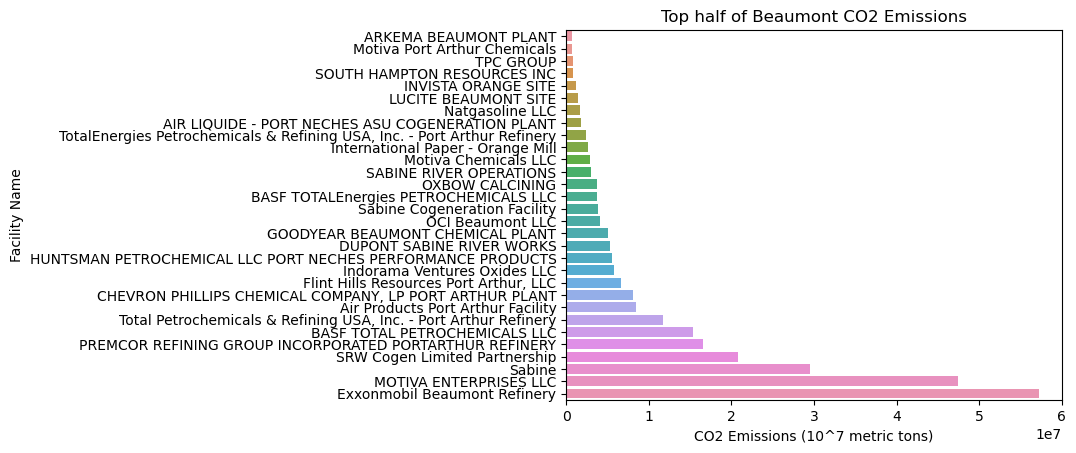

In [64]:
# plot the CO2 data
sns.barplot(facility_CO2_max, x="CO2 Emissions", y="Facility Name", orient="h").set(
    title='Top half of Beaumont CO2 Emissions', 
    xlabel= 'CO2 Emissions (10^7 metric tons)');

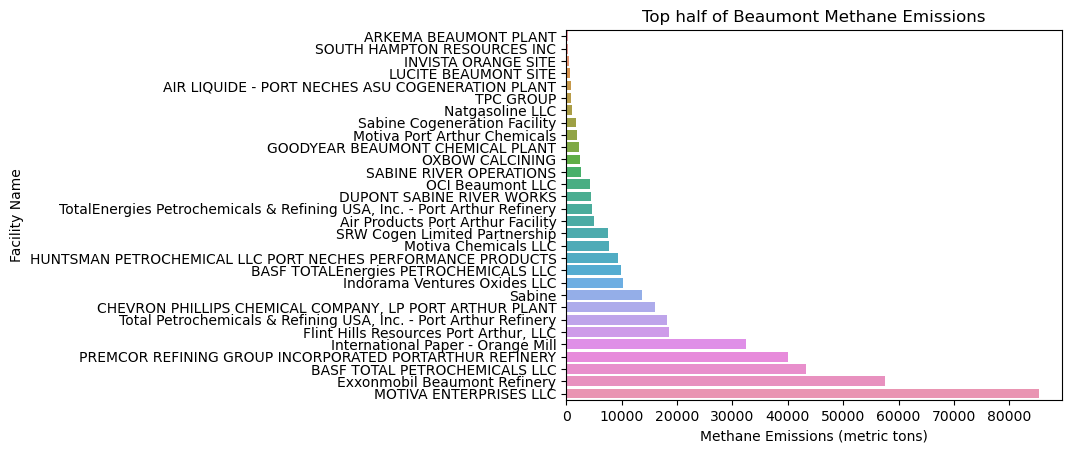

In [65]:
# plot Methane data
sns.barplot(facility_methane_max, x="Methane Emissions", y="Facility Name", orient="h").set(
    title='Top half of Beaumont Methane Emissions', 
    xlabel= 'Methane Emissions (metric tons)');


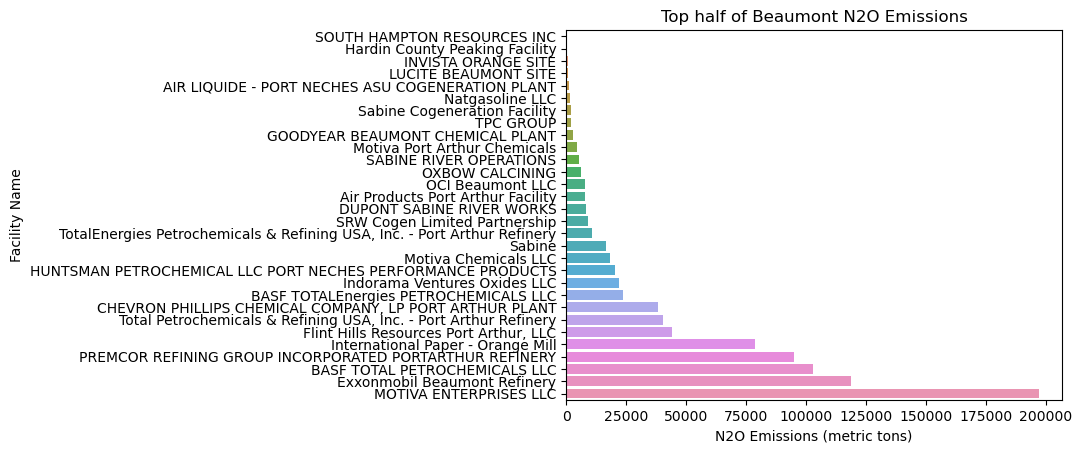

In [66]:
# plot N2O data
sns.barplot(facility_N2O_max, x="N2O Emissions", y="Facility Name", orient="h").set(
    title='Top half of Beaumont N2O Emissions', 
    xlabel= 'N2O Emissions (metric tons)');

In [67]:
# cities with no county name, do we care?
no_county = df[df['County'].isnull() == True]
no_county['City'].values

array(['offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', '5911 county road 136',
       '5911 county road 136', '5911 county road 136',
       '5911 county road 136', '5911 county road 136',
       '5911 county road 136', '5911 county road 136',
       '5911 county road 136', '5911 county road 136',
       '5911 county road 136', '5911 county road 136', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 'offshore',
       'offshore', 'offshore', 'offshore', 'offshore', 

In [68]:
avg = beaumont['CO2 Emissions'].mean()

In [69]:
co2_year = beaumont[beaumont['CO2 Emissions'] >= avg]

In [70]:
alt.Chart(co2_year).mark_bar(size = 15).encode(
    x='Reporting Year',
    y='sum(CO2 Emissions)',
    color='Facility Name'
)

/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [71]:
beaumont[beaumont['Facility Name'] == 'Sabine']

index  Facility Id        FRS Id Facility Name         City  County  \
2602  24205      1006721  1.100438e+11        Sabine  bridge city  Orange   
2603  24206      1006721  1.100438e+11        Sabine  bridge city  Orange   
2604  24207      1006721  1.100438e+11        Sabine  bridge city  Orange   
2605  24208      1006721  1.100438e+11        Sabine  bridge city  Orange   
2606  24209      1006721  1.100438e+11        Sabine  bridge city  Orange   
...     ...          ...           ...           ...          ...     ...   
2663  24266      1006721  1.100438e+11        Sabine  bridge city  Orange   
2664  24267      1006721  1.100438e+11        Sabine  bridge city  Orange   
2665  24268      1006721  1.100438e+11        Sabine  bridge city  Orange   
2666  24269      1006721  1.100438e+11        Sabine  bridge city  Orange   
2667  24270      1006721  1.100438e+11        Sabine  bridge city  Orange   

     State  Reporting Year Industry Type (subparts) Industry Type (sectors)  \
2602    TX            2022                      C,D            Power Plants   
2603    TX            2022                      C,D            Power Plants   
2604    TX            2022                      C,D            Power Plants   
2605    TX            2022                      C,D            Power Plants   
2606    TX            2022                      C,D            Power Plants   
...    ...             ...                      ...                     ...   
2663    TX            2011                      C,D            Power Plants   
2664    TX            2011                      C,D            Power Plants   
2665    TX            2011                      C,D            Power Plants   
2666    TX            2011                      C,D            Power Plants   
2667    TX            2011                      C,D            Power Plants   

     Unit Name                      Unit Type  CO2 Emissions  \
2602         1          Electricity Generator       160511.5   
2603         3          Electricity Generator       571121.5   
2604         4          Electricity Generator       386097.1   
2605         5          Electricity Generator       582759.0   
2606      GP-1  OCS (Other combustion source)            0.0   
...        ...                            ...            ...   
2663         2          Electricity Generator       315399.5   
2664         3          Electricity Generator       516542.0   
2665         4          Electricity Generator      1188778.8   
2666         5          Electricity Generator       411560.3   
2667      GP-1  OCS (Other combustion source)       100164.2   

      Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
2602              74.50         89.400                     0.0  
2603             264.75        318.860                     0.0  
2604             179.00        214.560                     0.0  
2605             270.25        324.820                     0.0  
2606               0.00          0.000                     0.0  
...                 ...            ...                     ...  
2663             146.25        175.820                     0.0  
2664             239.50        286.080                     0.0  
2665             551.25        655.600                     0.0  
2666             190.75        226.480                     0.0  
2667              47.25         56.322                     0.0  

[66 rows x 16 columns]

In [72]:
sabine = beaumont[beaumont['Facility Id'] == 1006721]

In [73]:
sabine['Facility Name'].unique()

array(['Sabine'], dtype=object)

In [74]:
facilities = beaumont.groupby(['Facility Id'])['Facility Name'].unique().to_frame()

In [75]:
facilities.head(50)

Facility Name
Facility Id                                                   
1000530                       [Hardin County Peaking Facility]
1001324                        [SRW Cogen Limited Partnership]
1002065                            [CITY OF BEAUMONT LANDFILL]
1002146      [CHEVRON PHILLIPS CHEMICAL COMPANY, LP PORT AR...
1002212                                  [INVISTA ORANGE SITE]
1002289                              [WEST BEAUMONT GAS PLANT]
1002657      [PREMCOR REFINING GROUP INCORPORATED PORTARTHU...
1002884                                            [TPC GROUP]
1002965                     [GOODYEAR BEAUMONT CHEMICAL PLANT]
1003149             [FLORIDA GAS TRANSMISSION COMPANY - VIDOR]
1003382      [DUPONT SABINE RIVER WORKS, SABINE RIVER OPERA...
1003780      [AIR LIQUIDE - PORT NECHES ASU COGENERATION PL...
1003781                            [Orange Carbon Black Plant]
1004714      [Jefferson Terminal South, LUCITE BEAUMONT SIT...
1004829      [SOUTH HAMPTON RESOURCES INC, TRECORA HYDROCAR...
1005523                                           [KMTEX, LLC]
1005623            [ISP Synthetic Elastomers, Lion Elastomers]
1005665                         [City of Port Arthur Landfill]
1005743      [Total Petrochemicals & Refining USA, Inc. - P...
1005850                             [BASF BEAUMONT AGRO PLANT]
1005909                    [International Paper - Orange Mill]
1006122                        [SPINDLETOP COMPRESSOR STATION]
1006402                    [Air Products Port Arthur Facility]
1006416                          [BEAUMONT POLYETHYLENE PLANT]
1006543      [BASF TOTAL PETROCHEMICALS LLC, BASF TOTALEner...
1006578                                      [OXBOW CALCINING]
1006644                                [ARKEMA BEAUMONT PLANT]
1006674                                [PORT ARTHUR GAS PLANT]
1006721                                               [Sabine]
1006856      [FIRESTONE POLYMERS ORANGE PLANT, LION ELASTOM...
1006891      [Flint Hills Resources Port Arthur, LLC, Motiv...
1007348        [GERDAU AMERISTEEL BEAUMONT, Optimus Steel LLC]
1007365                         [Sabine Cogeneration Facility]
1007458                               [MOTIVA ENTERPRISES LLC]
1007909      [HUNTSMAN PETROCHEMICAL LLC PORT NECHES PERFOR...
1007959                         [Exxonmobil Beaumont Refinery]
1009941                         [Golden Pass LNG Terminal LLC]
1010636                                     [OCI Beaumont LLC]
1011080        [Linde Facility 0379, Praxair Port Arthur #379]
1013382                                      [Natgasoline LLC]
1013391                                   [Nederland Terminal]
1013597                                    [Beaumont Terminal]
1013817                                 [ARLANXEO Orange Site]
1014234                  [Bayport Polymers LLC Ethane Cracker]
1014414                           [SILSBEE Compressor Station]
1014573                                                [Vidor]
1014728                       [Vidor (ETC) Compressor Station]

In [76]:
beaumont['Industry Type (sectors)'].unique()

array(['Chemicals', 'Chemicals, Suppliers of CO2', 'Other', 'Waste',
       'Chemicals, Petroleum Product Suppliers, Power Plants, Refineries',
       'Petroleum and Natural Gas Systems', 'Metals', 'Power Plants',
       'Pulp and Paper, Waste', 'Pulp and Paper',
       'Petroleum Product Suppliers, Refineries', 'Refineries'],
      dtype=object)

In [77]:
chemical = beaumont[(beaumont['Industry Type (sectors)'] == 'Chemicals') | (beaumont['Industry Type (sectors)'] == 'Chemicals, Suppliers of CO2')|
                    (beaumont['Industry Type (sectors)'] == 'Chemicals, Petroleum Product Suppliers, Power Plants, Refineries')]

/var/folders/zx/tqw9f93s3_v5bzd67p8t0wqm0000gn/T/ipykernel_23281/2840140175.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(chemical, x="CO2 Emissions", y="Facility Name", orient="h", ci = None).set(


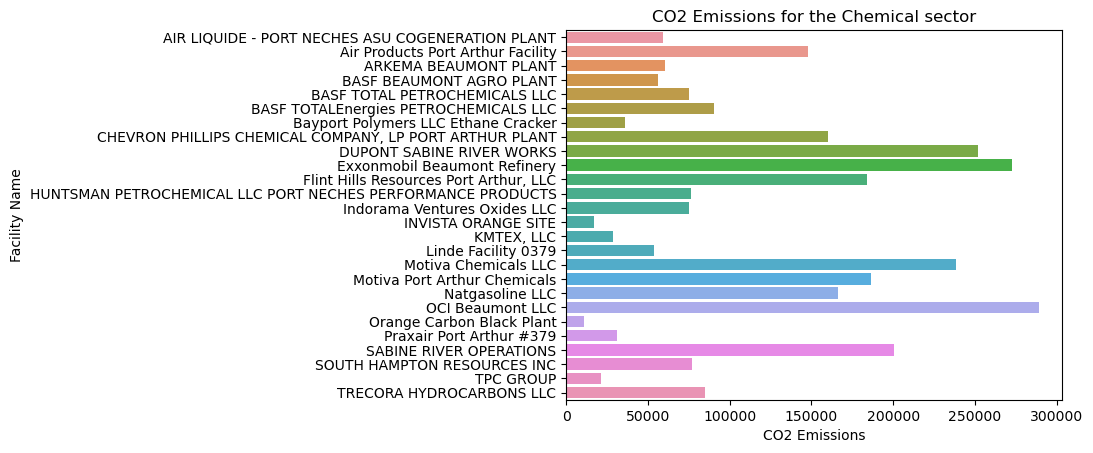

In [78]:
sns.barplot(chemical, x="CO2 Emissions", y="Facility Name", orient="h", ci = None).set(
    title='CO2 Emissions for the Chemical sector', 
    xlabel= 'CO2 Emissions');

In [79]:
facilities.to_csv('facilites.csv', index = True)

In [80]:
facility_emissions = beaumont.groupby(['Facility Id', 'Reporting Year'])[['CO2 Emissions', 'N2O Emissions', 'Methane Emissions']].sum()
facility_emissions

CO2 Emissions  N2O Emissions  Methane Emissions
Facility Id Reporting Year                                                 
1000530     2011                  84120.4         47.978              39.00
            2012                  77467.9         42.018              35.75
            2013                  40548.5         23.840              18.75
            2014                 102180.1         56.918              47.50
            2015                  72936.9         41.720              33.75
...                                   ...            ...                ...
1014234     2022                 388684.2        224.096             188.00
1014414     2021                  25101.6         14.006              11.75
            2022                  35594.0         19.966              16.75
1014573     2022                  16127.6          8.940               7.50
1014728     2022                  20557.9         11.622               9.75

[441 rows x 3 columns]

In [81]:
alt.Chart(co2_year).mark_bar(size = 15).encode(
    x='Reporting Year',
    y='sum(CO2 Emissions)',
    color='Facility Id:N'
)

/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [82]:
facility_emissions.to_csv('facility_emissions.csv', index = True)

In [83]:
sorted = beaumont.sort_values(['CO2 Emissions'])
sorted

index  Facility Id        FRS Id                 Facility Name  \
1148  15459      1002212  1.100383e+11           INVISTA ORANGE SITE   
1497  19178      1007458  1.100395e+11        MOTIVA ENTERPRISES LLC   
1086  15397      1002212  1.100383e+11           INVISTA ORANGE SITE   
1083  15394      1002212  1.100383e+11           INVISTA ORANGE SITE   
754   12679      1009941           NaN  Golden Pass LNG Terminal LLC   
...     ...          ...           ...                           ...   
575   10311      1007959  1.100420e+11  Exxonmobil Beaumont Refinery   
676   10412      1007959  1.100420e+11  Exxonmobil Beaumont Refinery   
612   10348      1007959  1.100420e+11  Exxonmobil Beaumont Refinery   
692   10428      1007959  1.100420e+11  Exxonmobil Beaumont Refinery   
661   10397      1007959  1.100420e+11  Exxonmobil Beaumont Refinery   

             City     County State  Reporting Year Industry Type (subparts)  \
1148       orange     Orange    TX            2011                    C,E,V   
1497  port arthur  Jefferson    TX            2020                   C,MM,Y   
1086       orange     Orange    TX            2022                        C   
1083       orange     Orange    TX            2022                        C   
754   sabine pass  Jefferson    TX            2015                      C,W   
...           ...        ...   ...             ...                      ...   
575      beaumont  Jefferson    TX            2018               C,D,MM,X,Y   
676      beaumont  Jefferson    TX            2012               C,D,MM,X,Y   
612      beaumont  Jefferson    TX            2016               C,D,MM,X,Y   
692      beaumont  Jefferson    TX            2011                  C,D,X,Y   
661      beaumont  Jefferson    TX            2013               C,D,MM,X,Y   

                                Industry Type (sectors)  \
1148                                          Chemicals   
1497            Petroleum Product Suppliers, Refineries   
1086                                          Chemicals   
1083                                          Chemicals   
754                   Petroleum and Natural Gas Systems   
...                                                 ...   
575   Chemicals, Petroleum Product Suppliers, Power ...   
676   Chemicals, Petroleum Product Suppliers, Power ...   
612   Chemicals, Petroleum Product Suppliers, Power ...   
692   Chemicals, Petroleum Product Suppliers, Power ...   
661   Chemicals, Petroleum Product Suppliers, Power ...   

                   Unit Name  \
1148               #7 Boiler   
1497   WAPI Thermal Oxidizer   
1086  GP- Compressor Engines   
1083               #8 Boiler   
754             HTF Heater-1   
...                      ...   
575     CP-Refinery Fuel Gas   
676     CP-Refinery Fuel Gas   
612     CP-Refinery Fuel Gas   
692     CP-Refinery Fuel Gas   
661     CP-Refinery Fuel Gas   

                                              Unit Type  CO2 Emissions  \
1148                                 OB (Boiler, other)            0.0   
1497  TODF (Thermal oxidizer, direct fired, no heat ...            0.0   
1086                      OCS (Other combustion source)            0.0   
1083                                 OB (Boiler, other)            0.0   
754                     NGLH (Heater, natural gas line)            0.0   
...                                                 ...            ...   
575                       OCS (Other combustion source)      1441848.3   
676                                                 NaN      1467301.7   
612                       OCS (Other combustion source)      1646012.4   
692                                                 NaN      1688964.9   
661                       OCS (Other combustion source)      1706359.4   

      Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
1148               0.00          0.000                     0.0  
1497               0.00          0.000                     0.0  
1086          

In [84]:
alt.Chart(sorted).mark_bar(size = 15).encode(
    x=alt.X('Facility Id:N').sort('y'),
    y=alt.Y('sum(CO2 Emissions)')
)

/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [85]:
alt.Chart(chemical).mark_bar(size = 15).encode(
    x= 'sum(CO2 Emissions)',
    y= alt.Y('Facility Name').sort('-x'),
    color=alt.value('green')
)

/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [86]:
alt.Chart(sorted).mark_bar(size = 15).encode(
    x=alt.X('Facility Id:N').sort('y'),
    y=alt.Y('sum(N2O Emissions)'),
    color = alt.value ('green')
)

/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [87]:
alt.Chart(sorted).mark_bar(size = 15).encode(
    x=alt.X('Facility Id:N').sort('y'),
    y=alt.Y('sum(Methane Emissions)'),
    color = alt.value('purple')
)

/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/karina/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [88]:
sectors = beaumont.groupby(['Industry Type (sectors)'])[['CO2 Emissions', 'N2O Emissions', 'Methane Emissions']].sum()
sectors

CO2 Emissions  \
Industry Type (sectors)                                             
Chemicals                                            7.103242e+07   
Chemicals, Petroleum Product Suppliers, Power P...   5.719310e+07   
Chemicals, Suppliers of CO2                          7.839508e+06   
Metals                                               6.282558e+05   
Other                                                8.674099e+06   
Petroleum Product Suppliers, Refineries              7.621313e+07   
Petroleum and Natural Gas Systems                    4.641507e+06   
Power Plants                                         5.491426e+07   
Pulp and Paper                                       6.259050e+04   
Pulp and Paper, Waste                                2.556340e+06   
Refineries                                           2.099128e+06   
Waste                                                1.328000e+02   

                                                    N2O Emissions  \
Industry Type (sectors)                                             
Chemicals                                              303392.012   
Chemicals, Petroleum Product Suppliers, Power P...     118723.498   
Chemicals, Suppliers of CO2                              7378.182   
Metals                                                    352.832   
Other                                                    5135.732   
Petroleum Product Suppliers, Refineries                334660.854   
Petroleum and Natural Gas Systems                        6580.436   
Power Plants                                            28161.596   
Pulp and Paper                                          10702.074   
Pulp and Paper, Waste                                   67997.640   
Refineries                                               8395.256   
Waste                                                       0.000   

                                                    Methane Emissions  
Industry Type (sectors)                                                
Chemicals                                                   133987.25  
Chemicals, Petroleum Product Suppliers, Power P...           57587.25  
Chemicals, Suppliers of CO2                                   4827.25  
Metals                                                         296.25  
Other                                                         4251.50  
Petroleum Product Suppliers, Refineries                     144562.35  
Petroleum and Natural Gas Systems                             2965.45  
Power Plants                                                 23363.25  
Pulp and Paper                                                5443.75  
Pulp and Paper, Waste                                        26963.50  
Refineries                                                    3612.25  
Waste                                                            0.00

In [89]:
sectors.to_csv('sectors.csv', index = True)

In [90]:
beaumont[beaumont['Facility Id'] == 1006543]

index  Facility Id        FRS Id                          Facility Name  \
115   1579      1006543  1.100061e+11          BASF TOTAL PETROCHEMICALS LLC   
116   1580      1006543  1.100061e+11          BASF TOTAL PETROCHEMICALS LLC   
117   1581      1006543  1.100061e+11          BASF TOTAL PETROCHEMICALS LLC   
118   1582      1006543  1.100061e+11          BASF TOTAL PETROCHEMICALS LLC   
119   1583      1006543  1.100061e+11          BASF TOTAL PETROCHEMICALS LLC   
..     ...          ...           ...                                    ...   
356   1820      1006543  1.100061e+11  BASF TOTALEnergies PETROCHEMICALS LLC   
357   1821      1006543  1.100061e+11  BASF TOTALEnergies PETROCHEMICALS LLC   
358   1822      1006543  1.100061e+11  BASF TOTALEnergies PETROCHEMICALS LLC   
359   1823      1006543  1.100061e+11  BASF TOTALEnergies PETROCHEMICALS LLC   
360   1824      1006543  1.100061e+11  BASF TOTALEnergies PETROCHEMICALS LLC   

            City     County State  Reporting Year Industry Type (subparts)  \
115  port arthur  Jefferson    TX            2020                      C,X   
116  port arthur  Jefferson    TX            2020                      C,X   
117  port arthur  Jefferson    TX            2020                      C,X   
118  port arthur  Jefferson    TX            2020                      C,X   
119  port arthur  Jefferson    TX            2020                      C,X   
..           ...        ...   ...             ...                      ...   
356  port arthur  Jefferson    TX            2021                      C,X   
357  port arthur  Jefferson    TX            2021                      C,X   
358  port arthur  Jefferson    TX            2021                      C,X   
359  port arthur  Jefferson    TX            2021                      C,X   
360  port arthur  Jefferson    TX            2021                      C,X   

    Industry Type (sectors) Unit Name  \
115               Chemicals    B-7240   
116               Chemicals    B-7280   
117               Chemicals    B-7290   
118               Chemicals     GTG-1   
119               Chemicals     GTG-2   
..                      ...       ...   
356               Chemicals    H-0900   
357               Chemicals    H-1000   
358               Chemicals    H-6101   
359               Chemicals    H-6102   
360               Chemicals    X-5701   

                                             Unit Type  CO2 Emissions  \
115                                 OB (Boiler, other)        51784.9   
116                                 OB (Boiler, other)       100441.6   
117                                 OB (Boiler, other)        94952.9   
118                CCCT (CC (Turbine, combined cycle))       220421.4   
119                CCCT (CC (Turbine, combined cycle))       164586.3   
..                                                 ...            ...   
356                               PRH (Process Heater)       121243.5   
357                               PRH (Process Heater)       139597.6   
358                               PRH (Process Heater)        22387.6   
359                               PRH (Process Heater)          444.4   
360  TODF (Thermal oxidizer, direct fired, no heat ...         4324.7   

     Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
115             105.50        251.214                     0.0  
116             227.25        541.764                     0.0  
117             215.75        514.348                     0.0  
118             475.00       1132.102                     0.0  
119             341.50        813.540                     0.0  
..                 ...            ...                     ...  
356             336.50        802.514                     0.0  
357             401.25        956.580                     0.0  
358              10.50         12.516                     0.0  
359               0.25          0.298                     0.0  
360              12.00         28

In [91]:
beaumont.groupby('Facility Id')[['CO2 Emissions','N2O Emissions','Methane Emissions']].sum().sort_values(by = 'CO2 Emissions')

CO2 Emissions  N2O Emissions  Methane Emissions
Facility Id                                                 
1005665       2.000000e+00          0.000               0.00
1002065       1.308000e+02          0.000               0.00
1009941       4.511600e+03          2.384               2.00
1002289       1.399970e+04          8.046               6.75
1014573       1.612760e+04          8.940               7.50
1014728       2.055790e+04         11.622               9.75
1003149       4.946480e+04         28.310              23.25
1013597       5.047900e+04         83.738              40.00
1014414       6.069560e+04         33.972              28.50
1003781       1.285576e+05         72.116              60.50
1013391       2.145229e+05        120.094             100.75
1006674       2.356216e+05        132.610             111.05
1006122       2.531157e+05        142.146             119.15
1005523       3.117018e+05        174.926             146.75
1011080       3.784624e+05        212.474             178.25
1005623       4.195080e+05        239.294             199.50
1006416       4.491704e+05        458.026             361.75
1014234       5.023528e+05        290.252             243.50
1013817       5.288443e+05        297.404             249.50
1007348       6.282558e+05        352.832             296.25
1005850       6.717806e+05        377.864             317.00
1000530       6.867881e+05        522.692             363.25
1006856       6.970178e+05        391.274             324.00
1006644       7.235400e+05        399.320             374.75
1002884       8.416443e+05       2224.272             940.00
1004829       9.301669e+05        522.096             438.00
1002212       1.221032e+06        696.128             578.75
1004714       1.550614e+06        868.074             730.50
1013382       1.664613e+06       1635.722            1017.50
1003780       1.829768e+06       1030.186             862.75
1005909       2.618931e+06      78699.714           32407.25
1006578       3.693790e+06       6047.910            2519.50
1007365       3.822150e+06       2154.540            1791.50
1010636       4.043260e+06       7658.302            4270.25
1002965       5.057564e+06       2842.324            2383.50
1002146       8.151241e+06      38256.644           16066.75
1003382       8.289328e+06      13677.604            7253.75
1006402       8.437751e+06       7676.182            5084.75
1006891       1.023617e+07      66894.146           28220.00
1007909       1.142224e+07      42368.448           19579.25
1005743       1.421600e+07      51221.134           22920.25
1002657       1.661671e+07      94904.656           39985.60
1006543       1.908832e+07     126603.512           53182.00
1001324       2.086016e+07       9020.460            7506.00
1006721       2.954516e+07      16463.904           13702.50
1007458       4.747954e+07     196930.320           85268.75
1007959       5.719310e+07     118723.498           57587.25

In [92]:
beaumont.groupby('Facility Id')[['CO2 Emissions','N2O Emissions','Methane Emissions']].sum().sort_values(by = 'N2O Emissions')

CO2 Emissions  N2O Emissions  Methane Emissions
Facility Id                                                 
1005665       2.000000e+00          0.000               0.00
1002065       1.308000e+02          0.000               0.00
1009941       4.511600e+03          2.384               2.00
1002289       1.399970e+04          8.046               6.75
1014573       1.612760e+04          8.940               7.50
1014728       2.055790e+04         11.622               9.75
1003149       4.946480e+04         28.310              23.25
1014414       6.069560e+04         33.972              28.50
1003781       1.285576e+05         72.116              60.50
1013597       5.047900e+04         83.738              40.00
1013391       2.145229e+05        120.094             100.75
1006674       2.356216e+05        132.610             111.05
1006122       2.531157e+05        142.146             119.15
1005523       3.117018e+05        174.926             146.75
1011080       3.784624e+05        212.474             178.25
1005623       4.195080e+05        239.294             199.50
1014234       5.023528e+05        290.252             243.50
1013817       5.288443e+05        297.404             249.50
1007348       6.282558e+05        352.832             296.25
1005850       6.717806e+05        377.864             317.00
1006856       6.970178e+05        391.274             324.00
1006644       7.235400e+05        399.320             374.75
1006416       4.491704e+05        458.026             361.75
1004829       9.301669e+05        522.096             438.00
1000530       6.867881e+05        522.692             363.25
1002212       1.221032e+06        696.128             578.75
1004714       1.550614e+06        868.074             730.50
1003780       1.829768e+06       1030.186             862.75
1013382       1.664613e+06       1635.722            1017.50
1007365       3.822150e+06       2154.540            1791.50
1002884       8.416443e+05       2224.272             940.00
1002965       5.057564e+06       2842.324            2383.50
1006578       3.693790e+06       6047.910            2519.50
1010636       4.043260e+06       7658.302            4270.25
1006402       8.437751e+06       7676.182            5084.75
1001324       2.086016e+07       9020.460            7506.00
1003382       8.289328e+06      13677.604            7253.75
1006721       2.954516e+07      16463.904           13702.50
1002146       8.151241e+06      38256.644           16066.75
1007909       1.142224e+07      42368.448           19579.25
1005743       1.421600e+07      51221.134           22920.25
1006891       1.023617e+07      66894.146           28220.00
1005909       2.618931e+06      78699.714           32407.25
1002657       1.661671e+07      94904.656           39985.60
1007959       5.719310e+07     118723.498           57587.25
1006543       1.908832e+07     126603.512           53182.00
1007458       4.747954e+07     196930.320           85268.75

In [93]:
beaumont[beaumont['Facility Id'] == 1007458]

index  Facility Id        FRS Id           Facility Name         City  \
1266  18947      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
1267  18948      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
1268  18949      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
1269  18950      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
1270  18951      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
...     ...          ...           ...                     ...          ...   
2195  19876      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
2196  19877      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
2197  19878      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
2198  19879      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   
2199  19880      1007458  1.100395e+11  MOTIVA ENTERPRISES LLC  port arthur   

         County State  Reporting Year Industry Type (subparts)  \
1266  Jefferson    TX            2022                   C,MM,Y   
1267  Jefferson    TX            2022                   C,MM,Y   
1268  Jefferson    TX            2022                   C,MM,Y   
1269  Jefferson    TX            2022                   C,MM,Y   
1270  Jefferson    TX            2022                   C,MM,Y   
...         ...   ...             ...                      ...   
2195  Jefferson    TX            2011                      C,Y   
2196  Jefferson    TX            2011                      C,Y   
2197  Jefferson    TX            2011                      C,Y   
2198  Jefferson    TX            2011                      C,Y   
2199  Jefferson    TX            2011                      C,Y   

                      Industry Type (sectors)  \
1266  Petroleum Product Suppliers, Refineries   
1267  Petroleum Product Suppliers, Refineries   
1268  Petroleum Product Suppliers, Refineries   
1269  Petroleum Product Suppliers, Refineries   
1270  Petroleum Product Suppliers, Refineries   
...                                       ...   
2195                               Refineries   
2196                               Refineries   
2197                               Refineries   
2198                               Refineries   
2199                               Refineries   

                                 Unit Name                      Unit Type  \
1266   #5 CRU Platformer and Charge Heater           PRH (Process Heater)   
1267  #5 CRU Platformer Heater No. 2 and 3           PRH (Process Heater)   
1268        CP-Natural Gas to Sulfur Block  OCS (Other combustion source)   
1269                CRU4 CRU Charge Heater           PRH (Process Heater)   
1270                CRU4 CRU Interheater I           PRH (Process Heater)   
...                                    ...                            ...   
2195      VPS4 Atmospheric No. 2 (IH-101B)           PRH (Process Heater)   
2196      VPS4 Atmospheric No. 3 (IH-101C)           PRH (Process Heater)   
2197        VPS4 Naphtha Splitter Reboiler           PRH (Process Heater)   
2198                     VPS4 Vacuum No. 1           PRH (Process Heater)   
2199                     VPS4 Vacuum No. 2           PRH (Process Heater)   

      CO2 Emissions  Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
1266       291215.8             610.00       1454.538                     0.0  
1267       148004.8             310.00        739.338                     0.0  
1268        70594.1              32.25         38.442                     0.0  
1269        64289.1             128.00        304.854                     0.0  
1270        58981.0             117.25        279.524                     0.0  
...             ...                ...            ...                     ...  
2195        64163.0             125.25        298.298                     0.0  
2196        53394.1             104.25        248.234                     0.0  
2197        13979.5           

In [94]:
beaumont[beaumont['Facility Id'] == 1006721]

index  Facility Id        FRS Id Facility Name         City  County  \
2602  24205      1006721  1.100438e+11        Sabine  bridge city  Orange   
2603  24206      1006721  1.100438e+11        Sabine  bridge city  Orange   
2604  24207      1006721  1.100438e+11        Sabine  bridge city  Orange   
2605  24208      1006721  1.100438e+11        Sabine  bridge city  Orange   
2606  24209      1006721  1.100438e+11        Sabine  bridge city  Orange   
...     ...          ...           ...           ...          ...     ...   
2663  24266      1006721  1.100438e+11        Sabine  bridge city  Orange   
2664  24267      1006721  1.100438e+11        Sabine  bridge city  Orange   
2665  24268      1006721  1.100438e+11        Sabine  bridge city  Orange   
2666  24269      1006721  1.100438e+11        Sabine  bridge city  Orange   
2667  24270      1006721  1.100438e+11        Sabine  bridge city  Orange   

     State  Reporting Year Industry Type (subparts) Industry Type (sectors)  \
2602    TX            2022                      C,D            Power Plants   
2603    TX            2022                      C,D            Power Plants   
2604    TX            2022                      C,D            Power Plants   
2605    TX            2022                      C,D            Power Plants   
2606    TX            2022                      C,D            Power Plants   
...    ...             ...                      ...                     ...   
2663    TX            2011                      C,D            Power Plants   
2664    TX            2011                      C,D            Power Plants   
2665    TX            2011                      C,D            Power Plants   
2666    TX            2011                      C,D            Power Plants   
2667    TX            2011                      C,D            Power Plants   

     Unit Name                      Unit Type  CO2 Emissions  \
2602         1          Electricity Generator       160511.5   
2603         3          Electricity Generator       571121.5   
2604         4          Electricity Generator       386097.1   
2605         5          Electricity Generator       582759.0   
2606      GP-1  OCS (Other combustion source)            0.0   
...        ...                            ...            ...   
2663         2          Electricity Generator       315399.5   
2664         3          Electricity Generator       516542.0   
2665         4          Electricity Generator      1188778.8   
2666         5          Electricity Generator       411560.3   
2667      GP-1  OCS (Other combustion source)       100164.2   

      Methane Emissions  N2O Emissions  Biogenic CO2 Emissions  
2602              74.50         89.400                     0.0  
2603             264.75        318.860                     0.0  
2604             179.00        214.560                     0.0  
2605             270.25        324.820                     0.0  
2606               0.00          0.000                     0.0  
...                 ...            ...                     ...  
2663             146.25        175.820                     0.0  
2664             239.50        286.080                     0.0  
2665             551.25        655.600                     0.0  
2666             190.75        226.480                     0.0  
2667              47.25         56.322                     0.0  

[66 rows x 16 columns]

In [95]:
facility_emission_sum = beaumont.groupby('Facility Id')[['CO2 Emissions','N2O Emissions','Methane Emissions']].sum()
facility_emission_sum

CO2 Emissions  N2O Emissions  Methane Emissions
Facility Id                                                 
1000530       6.867881e+05        522.692             363.25
1001324       2.086016e+07       9020.460            7506.00
1002065       1.308000e+02          0.000               0.00
1002146       8.151241e+06      38256.644           16066.75
1002212       1.221032e+06        696.128             578.75
1002289       1.399970e+04          8.046               6.75
1002657       1.661671e+07      94904.656           39985.60
1002884       8.416443e+05       2224.272             940.00
1002965       5.057564e+06       2842.324            2383.50
1003149       4.946480e+04         28.310              23.25
1003382       8.289328e+06      13677.604            7253.75
1003780       1.829768e+06       1030.186             862.75
1003781       1.285576e+05         72.116              60.50
1004714       1.550614e+06        868.074             730.50
1004829       9.301669e+05        522.096             438.00
1005523       3.117018e+05        174.926             146.75
1005623       4.195080e+05        239.294             199.50
1005665       2.000000e+00          0.000               0.00
1005743       1.421600e+07      51221.134           22920.25
1005850       6.717806e+05        377.864             317.00
1005909       2.618931e+06      78699.714           32407.25
1006122       2.531157e+05        142.146             119.15
1006402       8.437751e+06       7676.182            5084.75
1006416       4.491704e+05        458.026             361.75
1006543       1.908832e+07     126603.512           53182.00
1006578       3.693790e+06       6047.910            2519.50
1006644       7.235400e+05        399.320             374.75
1006674       2.356216e+05        132.610             111.05
1006721       2.954516e+07      16463.904           13702.50
1006856       6.970178e+05        391.274             324.00
1006891       1.023617e+07      66894.146           28220.00
1007348       6.282558e+05        352.832             296.25
1007365       3.822150e+06       2154.540            1791.50
1007458       4.747954e+07     196930.320           85268.75
1007909       1.142224e+07      42368.448           19579.25
1007959       5.719310e+07     118723.498           57587.25
1009941       4.511600e+03          2.384               2.00
1010636       4.043260e+06       7658.302            4270.25
1011080       3.784624e+05        212.474             178.25
1013382       1.664613e+06       1635.722            1017.50
1013391       2.145229e+05        120.094             100.75
1013597       5.047900e+04         83.738              40.00
1013817       5.288443e+05        297.404             249.50
1014234       5.023528e+05        290.252             243.50
1014414       6.069560e+04         33.972              28.50
1014573       1.612760e+04          8.940               7.50
1014728       2.055790e+04         11.622               9.75

In [96]:
facility_emission_sum.to_csv('facility_emission_sum.csv')

In [97]:
#hello 
#testing